<a href="https://colab.research.google.com/github/grullaandrea-png/mushroom_classification_model_dervishi/blob/main/model1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!mkdir -p /content/dataset
!unzip "/content/drive/MyDrive/Deep_learning_project/archive (9).zip" -d "/content/dataset"

Output streaming troncato alle ultime 5000 righe.
  inflating: /content/dataset/Data/Inocybe/Inocybe_original_AE2014PIC62591207.jpg_545e1a0f-1d78-492a-8709-9f5ceb43569f.jpg  
  inflating: /content/dataset/Data/Inocybe/Inocybe_original_AE2014PIC62591207.jpg_e4d7c54d-d437-43fe-b6b5-eab0ddbd559a.jpg  
  inflating: /content/dataset/Data/Inocybe/Inocybe_original_AE2015PIC76548267.jpg_61ebf998-b459-4fc7-8d59-d17a49089c7f.jpg  
  inflating: /content/dataset/Data/Inocybe/Inocybe_original_ALO2015PIC74715276.jpg_dbd2bff2-da30-47c6-ae31-5cdc47175911.jpg  
  inflating: /content/dataset/Data/Inocybe/Inocybe_original_ALO2015PIC74715276.jpg_ff6e1280-44e5-44aa-8220-435738b08997.jpg  
  inflating: /content/dataset/Data/Inocybe/Inocybe_original_ANB2016-9178693_rkxA21PQyx.jpg_89b988b0-c4ae-4c8c-8c92-879b4e0d2a90.jpg  
  inflating: /content/dataset/Data/Inocybe/Inocybe_original_AS2009PIC41853880.jpg_27349cea-c52c-483d-b2dd-e99ced31da85.jpg  
  inflating: /content/dataset/Data/Inocybe/Inocybe_original_AS20

In [8]:
import os

data_dir = '/content/dataset/Data'
print("Classi trovate:", os.listdir(data_dir))

import os

# Il percorso dove abbiamo estratto i dati
dataset_path = '/content/dataset/Data'

conteggi = {}

if os.path.exists(dataset_path):
    # Prende tutte le cartelle delle classi
    classi = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]

    for classe in classi:
        path_classe = os.path.join(dataset_path, classe)
        # Conta quanti file ci sono nella cartella
        n_immagini = len(os.listdir(path_classe))
        conteggi[classe] = n_immagini
        print(f"Classe: {classe:<20} | Immagini: {n_immagini}")

    print("-" * 40)
    print(f"Totale immagini: {sum(conteggi.values())}")
else:
    print("Errore: Cartella non trovata. Hai eseguito l'unzip nel passaggio precedente?")

Classi trovate: ['Exidia', 'Lactarius', 'Boletus', 'Suillus', 'Inocybe', 'Pluteus', 'Agaricus', 'Hygrocybe', 'Russula', 'Cortinarius', 'Amanita', 'Entoloma']
Classe: Exidia               | Immagini: 1000
Classe: Lactarius            | Immagini: 1000
Classe: Boletus              | Immagini: 1000
Classe: Suillus              | Immagini: 1000
Classe: Inocybe              | Immagini: 1000
Classe: Pluteus              | Immagini: 1000
Classe: Agaricus             | Immagini: 1000
Classe: Hygrocybe            | Immagini: 1000
Classe: Russula              | Immagini: 1000
Classe: Cortinarius          | Immagini: 1000
Classe: Amanita              | Immagini: 1000
Classe: Entoloma             | Immagini: 1000
----------------------------------------
Totale immagini: 12000


In [4]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import os

# 1. Impostazioni
data_dir = '/content/dataset/Data'
batch_size = 32
img_height, img_width = 224, 224 # Dimensione standard per modelli PyTorch (es. ResNet)

# 2. Definiamo le trasformazioni (Ridimensionamento + Conversione in Tensore)
data_transforms = transforms.Compose([
    transforms.Resize((img_height, img_width)),
    transforms.ToTensor(),
    # transforms.Normalize(...) # Opzionale: decommentare se usi modelli pre-addestrati
])

# 3. Carichiamo l'intero dataset
full_dataset = datasets.ImageFolder(root=data_dir, transform=data_transforms)

# 4. Calcoliamo le dimensioni per lo split (70% - 10% - 20%)
total_size = len(full_dataset)
train_size = int(0.7 * total_size)
val_size = int(0.1 * total_size)
test_size = total_size - train_size - val_size # Il resto va al test per evitare errori di arrotondamento

print(f"Totale immagini: {total_size}")
print(f"Training: {train_size} | Validation: {val_size} | Test: {test_size}")

# 5. Eseguiamo la divisione casuale
# Usiamo un seed (42) per rendere la divisione riproducibile
generator = torch.Generator().manual_seed(42)
train_dataset, val_dataset, test_dataset = random_split(
    full_dataset,
    [train_size, val_size, test_size],
    generator=generator
)

# 6. Creiamo i DataLoader (I tubi che portano i dati al modello)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print("DataLoader creati con successo!")

Totale immagini: 12000
Training: 8400 | Validation: 1200 | Test: 2400
DataLoader creati con successo!


Classi trovate: ['Agaricus', 'Amanita', 'Boletus', 'Cortinarius', 'Entoloma', 'Exidia', 'Hygrocybe', 'Inocybe', 'Lactarius', 'Pluteus', 'Russula', 'Suillus']


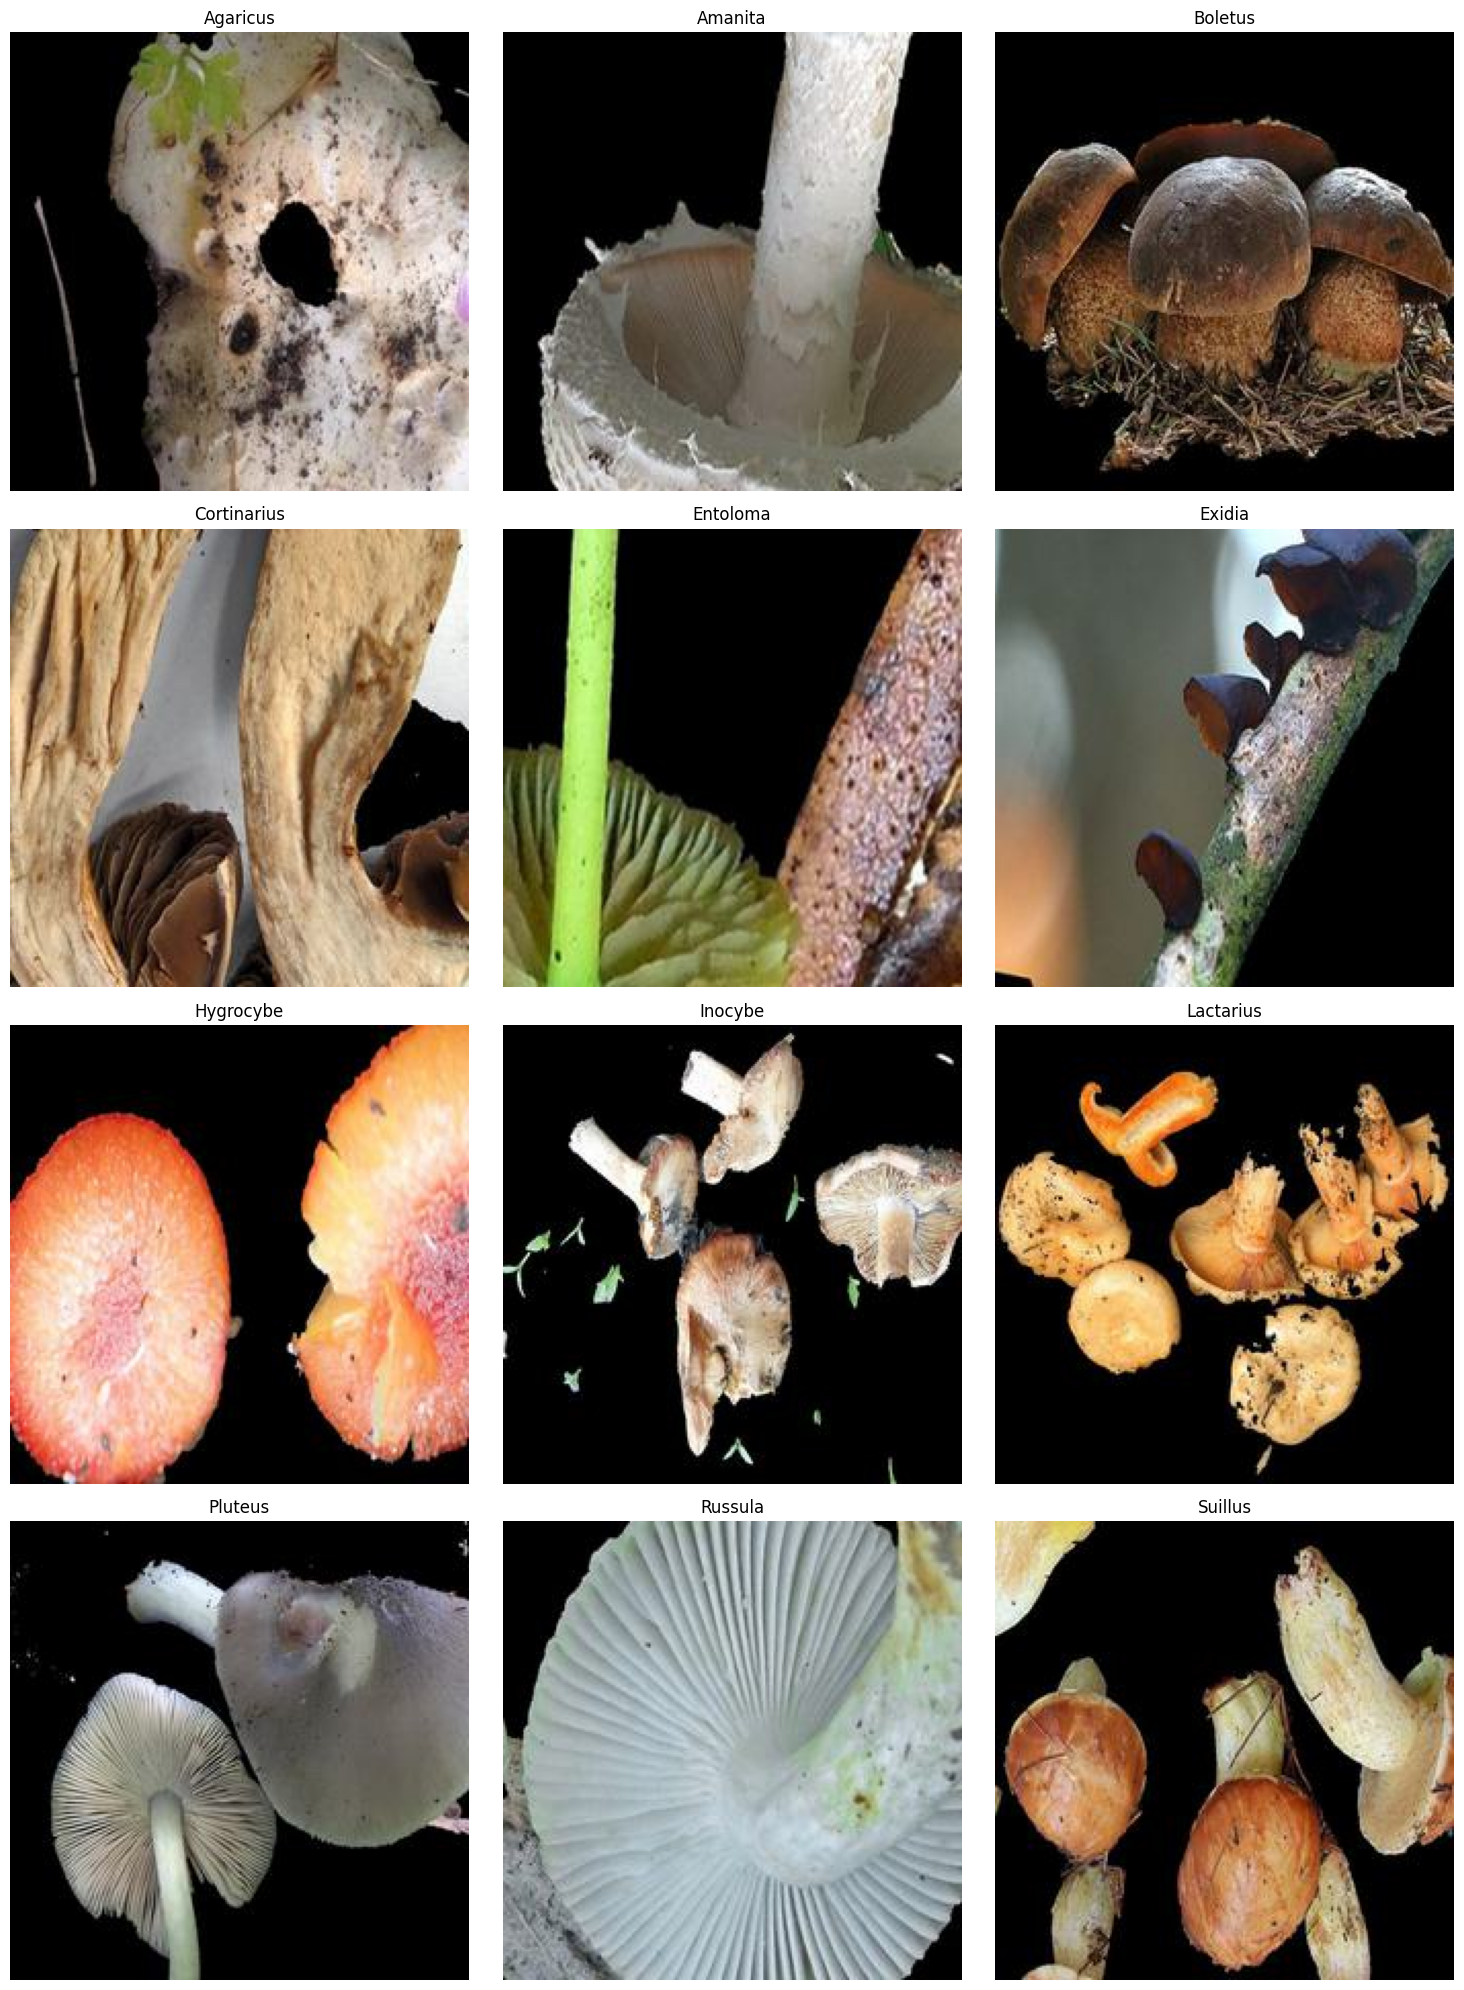

In [5]:
import matplotlib.pyplot as plt
from PIL import Image
import math

# Otteniamo i nomi delle classi dal dataset
class_names = full_dataset.classes
print(f"Classi trovate: {class_names}")

# Impostiamo la griglia
num_classes = len(class_names)
cols = 3
rows = math.ceil(num_classes / cols)

plt.figure(figsize=(15, 5 * rows))

for i, class_name in enumerate(class_names):
    # Costruiamo il percorso alla cartella della classe
    class_folder = os.path.join(data_dir, class_name)

    # Prendiamo il primo file immagine disponibile nella cartella
    if os.path.isdir(class_folder):
        files = os.listdir(class_folder)
        if len(files) > 0:
            img_path = os.path.join(class_folder, files[0])

            # Carichiamo l'immagine con PIL
            img = Image.open(img_path)

            # Plot
            plt.subplot(rows, cols, i + 1)
            plt.imshow(img)
            plt.title(class_name)
            plt.axis("off")

plt.tight_layout()
plt.show()

In [13]:
import torch
import torch.nn as nn
from torchvision import models

class MushroomResNet(nn.Module):
    def __init__(self, num_classes, freeze_layers=True):
        """
        Args:
            num_classes (int): Numero di categorie di funghi.
            freeze_layers (bool): Se True, congela i pesi della parte convoluzionale
                                  (Feature Extraction). Se False, addestra tutta la rete.
        """
        super(MushroomResNet, self).__init__()

        # 1. Scarichiamo la ResNet18 pre-addestrata
        # weights='DEFAULT' usa i pesi migliori disponibili (ImageNet)
        self.resnet = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)

        # 2. Congelamento dei pesi (Transfer Learning - Feature Extraction)
        # Se freeze_layers è True, diciamo a PyTorch di NON calcolare i gradienti per la parte "corpo"
        if freeze_layers:
            for param in self.resnet.parameters():
                param.requires_grad = False

        # 3. Sostituzione della "testa" (Classificatore)
        # ResNet18 ha un attributo 'fc' (Fully Connected) che è l'ultimo strato.
        # Prendiamo il numero di feature in entrata a questo strato (solitamente 512 per ResNet18)
        num_features = self.resnet.fc.in_features

        # Sostituiamo self.resnet.fc con un nuovo layer Lineare
        # Nota: I nuovi layer creati hanno di default requires_grad=True, quindi verranno addestrati.
        self.resnet.fc = nn.Linear(num_features, num_classes)

    def forward(self, x):
        # Passiamo l'input attraverso tutta la resnet (che ora include il nostro nuovo fc finale)
        return self.resnet(x)

# --- Istanziazione ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_classes = len(full_dataset.classes) # Assicurati che full_dataset sia definito

# Creiamo il modello (con congelamento attivo)
model = MushroomResNet(num_classes=num_classes, freeze_layers=True)
model = model.to(device)

print(f"Modello MushroomResNet caricato su {device} per {num_classes} classi.")

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 221MB/s]

Modello MushroomResNet caricato su cuda per 12 classi.


In [14]:
import torch.optim as optim

# 1. Verifica disponibilità GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Sto usando il device: {device}")

# 2. Sposta il modello sulla GPU
model = model.to(device)

# 3. Definisci la funzione di costo (Loss) e l'ottimizzatore
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001) # Learning rate

Sto usando il device: cuda


Inizio addestramento su cuda...
Il modello migliore verrà salvato in: /content/drive/MyDrive/Deep_learning_project/best_mushroom_model.pth
Epoca [1/50] | Train Loss: 1.7374 | Val Loss: 1.4147 | Val Acc: 52.58%
--> Miglioramento! Salvataggio modello... (Accuratezza: 0.00% -> 52.58%)
Epoca [2/50] | Train Loss: 1.3060 | Val Loss: 1.2605 | Val Acc: 57.25%
--> Miglioramento! Salvataggio modello... (Accuratezza: 52.58% -> 57.25%)
Epoca [3/50] | Train Loss: 1.1862 | Val Loss: 1.1887 | Val Acc: 59.08%
--> Miglioramento! Salvataggio modello... (Accuratezza: 57.25% -> 59.08%)
Epoca [4/50] | Train Loss: 1.1122 | Val Loss: 1.1318 | Val Acc: 62.42%
--> Miglioramento! Salvataggio modello... (Accuratezza: 59.08% -> 62.42%)
Epoca [5/50] | Train Loss: 1.0675 | Val Loss: 1.1311 | Val Acc: 60.17%


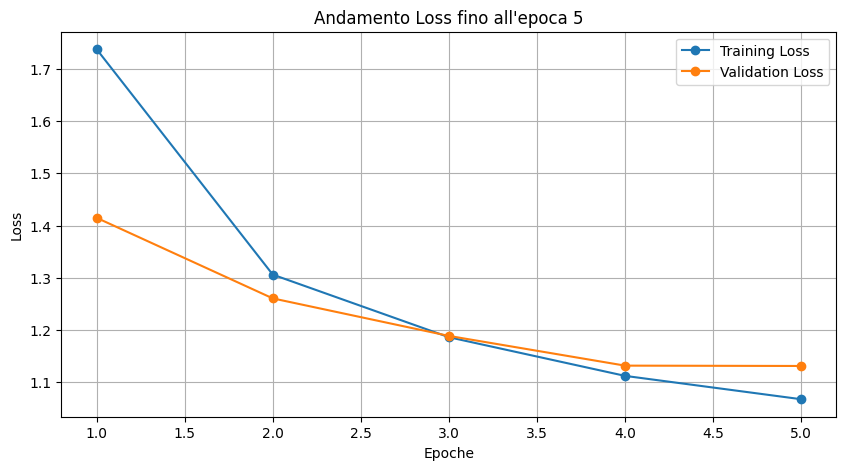

Epoca [6/50] | Train Loss: 1.0344 | Val Loss: 1.1013 | Val Acc: 61.58%
Epoca [7/50] | Train Loss: 1.0094 | Val Loss: 1.0907 | Val Acc: 61.58%
Epoca [8/50] | Train Loss: 0.9887 | Val Loss: 1.0883 | Val Acc: 61.50%
Epoca [9/50] | Train Loss: 0.9609 | Val Loss: 1.1114 | Val Acc: 61.00%
Epoca [10/50] | Train Loss: 0.9568 | Val Loss: 1.0778 | Val Acc: 62.67%
--> Miglioramento! Salvataggio modello... (Accuratezza: 62.42% -> 62.67%)


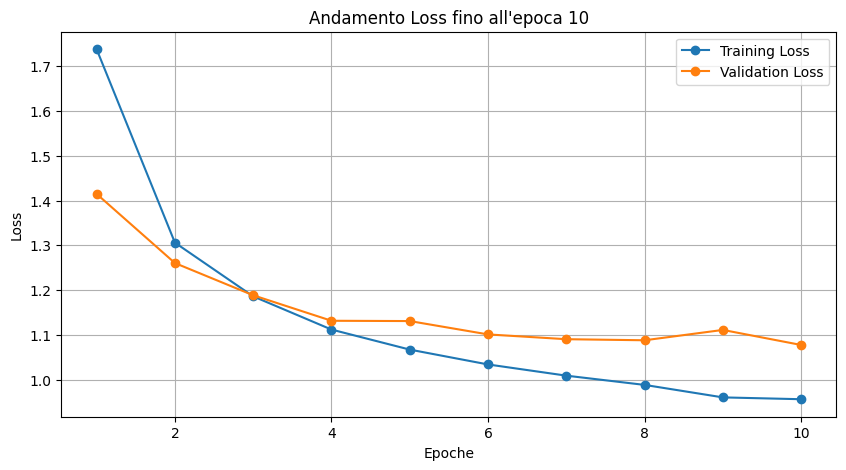

Epoca [11/50] | Train Loss: 0.9429 | Val Loss: 1.0809 | Val Acc: 62.17%
Epoca [12/50] | Train Loss: 0.9273 | Val Loss: 1.0557 | Val Acc: 63.08%
--> Miglioramento! Salvataggio modello... (Accuratezza: 62.67% -> 63.08%)
Epoca [13/50] | Train Loss: 0.9212 | Val Loss: 1.0608 | Val Acc: 63.83%
--> Miglioramento! Salvataggio modello... (Accuratezza: 63.08% -> 63.83%)
Epoca [14/50] | Train Loss: 0.9095 | Val Loss: 1.0584 | Val Acc: 63.50%
Epoca [15/50] | Train Loss: 0.8931 | Val Loss: 1.0855 | Val Acc: 61.42%


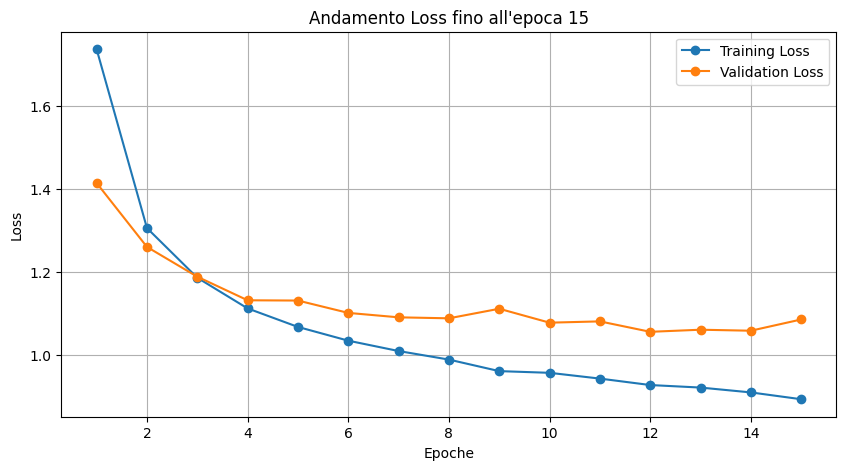

Epoca [16/50] | Train Loss: 0.8946 | Val Loss: 1.0717 | Val Acc: 62.08%
Epoca [17/50] | Train Loss: 0.8981 | Val Loss: 1.0686 | Val Acc: 61.33%
Epoca [18/50] | Train Loss: 0.8881 | Val Loss: 1.0405 | Val Acc: 63.25%
Epoca [19/50] | Train Loss: 0.8667 | Val Loss: 1.0453 | Val Acc: 64.17%
--> Miglioramento! Salvataggio modello... (Accuratezza: 63.83% -> 64.17%)
Epoca [20/50] | Train Loss: 0.8665 | Val Loss: 1.0716 | Val Acc: 61.00%


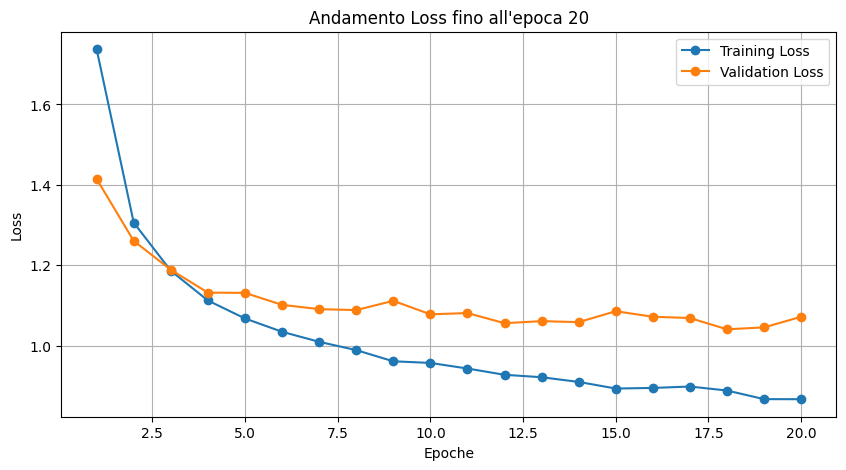

Epoca [21/50] | Train Loss: 0.8649 | Val Loss: 1.0446 | Val Acc: 63.67%
Epoca [22/50] | Train Loss: 0.8631 | Val Loss: 1.0467 | Val Acc: 64.17%
Epoca [23/50] | Train Loss: 0.8519 | Val Loss: 1.1015 | Val Acc: 61.17%
Epoca [24/50] | Train Loss: 0.8516 | Val Loss: 1.0754 | Val Acc: 61.83%
Epoca [25/50] | Train Loss: 0.8410 | Val Loss: 1.0556 | Val Acc: 61.83%


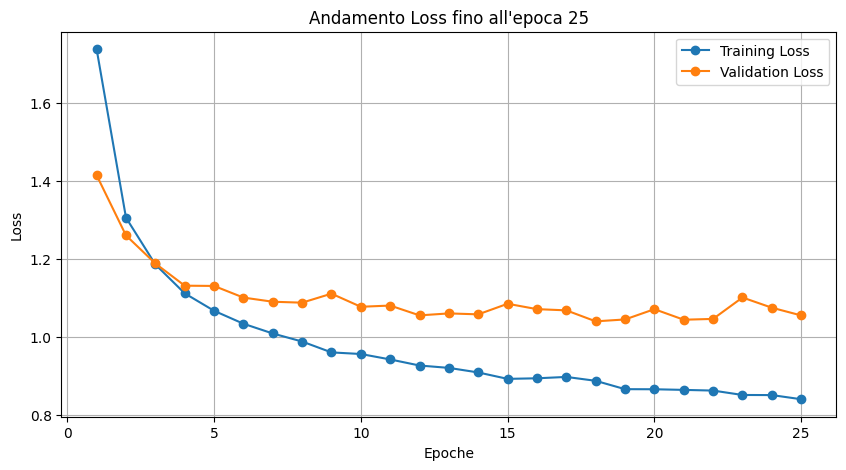

Epoca [26/50] | Train Loss: 0.8453 | Val Loss: 1.0805 | Val Acc: 61.83%
Epoca [27/50] | Train Loss: 0.8330 | Val Loss: 1.0769 | Val Acc: 63.42%
Epoca [28/50] | Train Loss: 0.8434 | Val Loss: 1.0562 | Val Acc: 63.58%
Epoca [29/50] | Train Loss: 0.8461 | Val Loss: 1.0656 | Val Acc: 62.17%
Epoca [30/50] | Train Loss: 0.8346 | Val Loss: 1.0697 | Val Acc: 62.25%


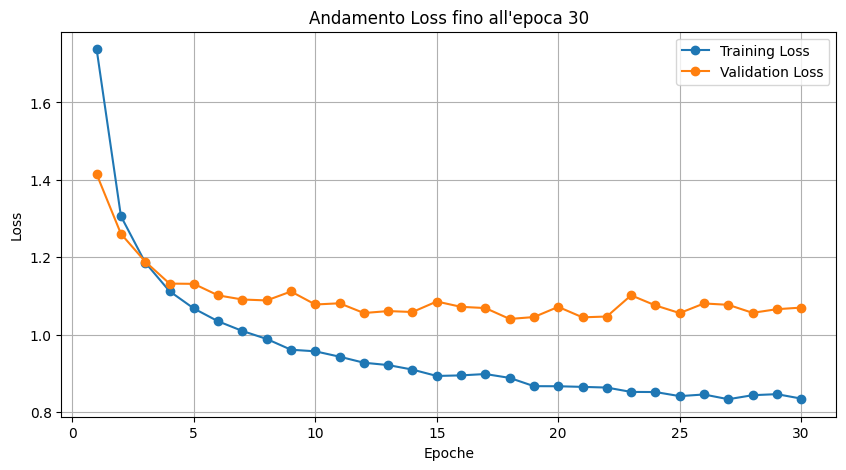

Epoca [31/50] | Train Loss: 0.8261 | Val Loss: 1.0576 | Val Acc: 63.08%
Epoca [32/50] | Train Loss: 0.8259 | Val Loss: 1.0836 | Val Acc: 61.50%
Epoca [33/50] | Train Loss: 0.8160 | Val Loss: 1.0507 | Val Acc: 63.42%
Epoca [34/50] | Train Loss: 0.8142 | Val Loss: 1.0651 | Val Acc: 62.08%
Epoca [35/50] | Train Loss: 0.8107 | Val Loss: 1.0492 | Val Acc: 62.92%


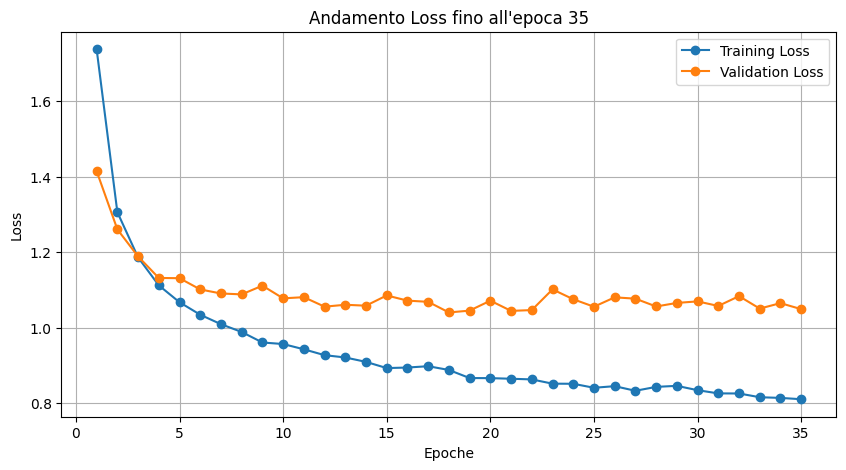

Epoca [36/50] | Train Loss: 0.8150 | Val Loss: 1.0502 | Val Acc: 63.42%
Epoca [37/50] | Train Loss: 0.8023 | Val Loss: 1.0745 | Val Acc: 63.17%
Epoca [38/50] | Train Loss: 0.8006 | Val Loss: 1.0679 | Val Acc: 62.58%
Epoca [39/50] | Train Loss: 0.8030 | Val Loss: 1.0635 | Val Acc: 62.25%
Epoca [40/50] | Train Loss: 0.7969 | Val Loss: 1.0452 | Val Acc: 63.00%


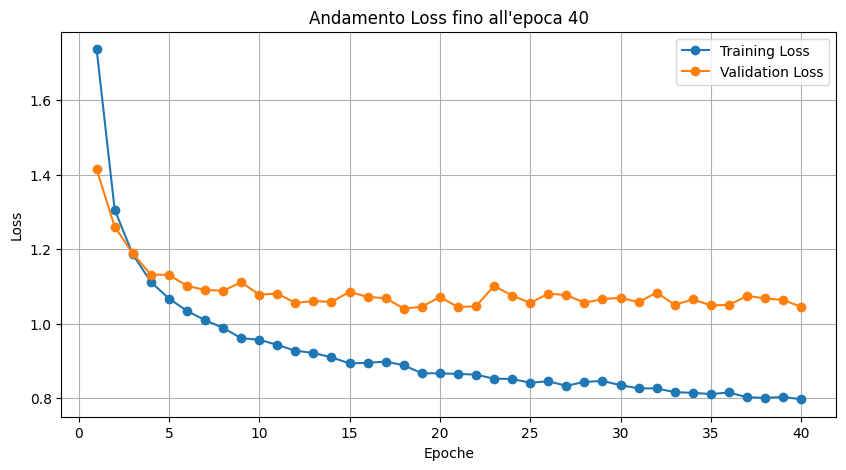

Epoca [41/50] | Train Loss: 0.8083 | Val Loss: 1.0882 | Val Acc: 63.75%
Epoca [42/50] | Train Loss: 0.7965 | Val Loss: 1.0687 | Val Acc: 63.33%
Epoca [43/50] | Train Loss: 0.8026 | Val Loss: 1.0794 | Val Acc: 63.33%
Epoca [44/50] | Train Loss: 0.7890 | Val Loss: 1.0689 | Val Acc: 63.00%
Epoca [45/50] | Train Loss: 0.7957 | Val Loss: 1.0755 | Val Acc: 63.75%


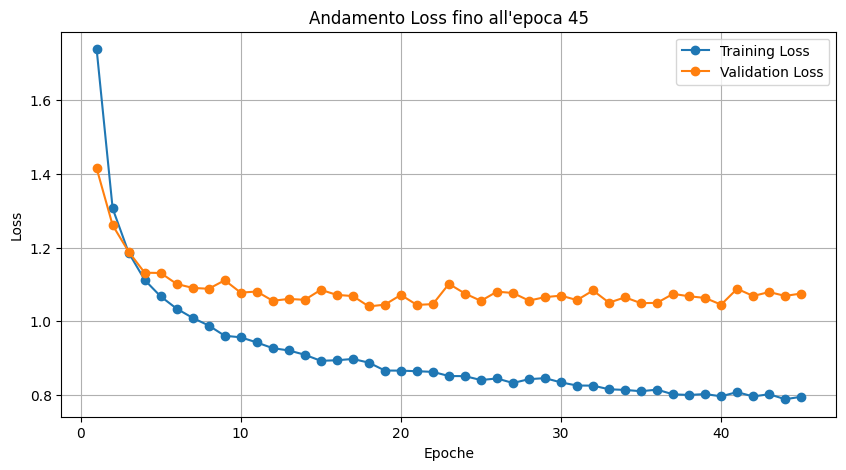

Epoca [46/50] | Train Loss: 0.7883 | Val Loss: 1.0649 | Val Acc: 62.83%
Epoca [47/50] | Train Loss: 0.7904 | Val Loss: 1.0637 | Val Acc: 62.83%
Epoca [48/50] | Train Loss: 0.7882 | Val Loss: 1.0722 | Val Acc: 62.50%
Epoca [49/50] | Train Loss: 0.7873 | Val Loss: 1.0854 | Val Acc: 63.42%
Epoca [50/50] | Train Loss: 0.7906 | Val Loss: 1.0860 | Val Acc: 62.58%


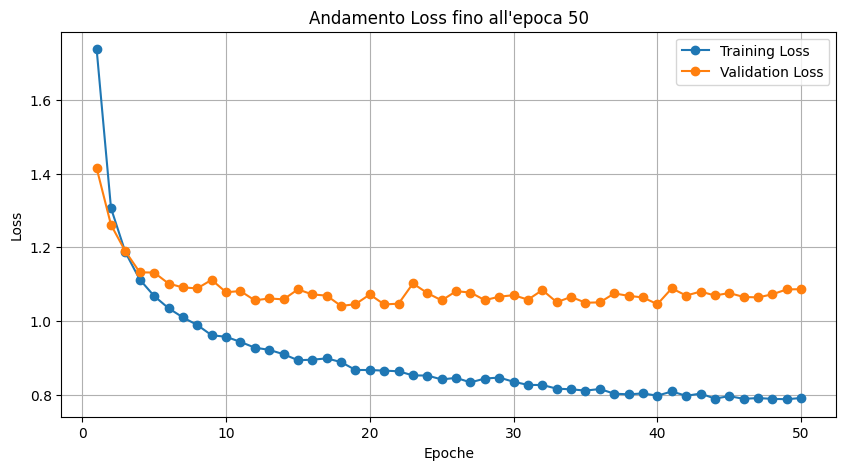

------------------------------
Addestramento completato! Migliore accuratezza raggiunta: 64.17%
Modello salvato in: /content/drive/MyDrive/Deep_learning_project/best_mushroom_model.pth


In [15]:
import matplotlib.pyplot as plt
import torch
import os
from IPython.display import clear_output

# --- CONFIGURAZIONE SALVATAGGIO ---
# Percorso dove salvare il modello nel tuo Drive
save_path = '/content/drive/MyDrive/Deep_learning_project/best_mushroom_model.pth'

# Variabile per tracciare la migliore accuratezza raggiunta finora
best_val_acc = 0.0

# Liste per lo storico
train_losses = []
val_losses = []

num_epochs = 50

print(f"Inizio addestramento su {device}...")
print(f"Il modello migliore verrà salvato in: {save_path}")

for epoch in range(num_epochs):
    # --- TRAIN ---
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_train_loss = running_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # --- VALIDATION ---
    model.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    avg_val_loss = val_loss / len(val_loader)
    val_losses.append(avg_val_loss)
    val_acc = 100 * correct_val / total_val

    print(f"Epoca [{epoch+1}/{num_epochs}] | Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f} | Val Acc: {val_acc:.2f}%")

    # --- SALVATAGGIO DEL MODELLO MIGLIORE ---
    # Se l'accuratezza attuale è maggiore del record precedente, salviamo!
    if val_acc > best_val_acc:
        print(f"--> Miglioramento! Salvataggio modello... (Accuratezza: {best_val_acc:.2f}% -> {val_acc:.2f}%)")
        best_val_acc = val_acc
        torch.save(model.state_dict(), save_path)

    # --- PLOT OGNI 5 EPOCHE ---
    if (epoch + 1) % 5 == 0:
        plt.figure(figsize=(10, 5))
        plt.plot(range(1, epoch + 2), train_losses, label='Training Loss', marker='o')
        plt.plot(range(1, epoch + 2), val_losses, label='Validation Loss', marker='o')
        plt.title(f'Andamento Loss fino all\'epoca {epoch + 1}')
        plt.xlabel('Epoche')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True)
        plt.show()

print("-" * 30)
print(f"Addestramento completato! Migliore accuratezza raggiunta: {best_val_acc:.2f}%")
print(f"Modello salvato in: {save_path}")

Avvio valutazione sul Test Set...

REPORT DI CLASSIFICAZIONE
              precision    recall  f1-score   support

    Agaricus       0.66      0.45      0.53       196
     Amanita       0.63      0.74      0.68       191
     Boletus       0.84      0.68      0.75       223
 Cortinarius       0.62      0.55      0.59       199
    Entoloma       0.44      0.71      0.54       183
      Exidia       0.88      0.92      0.90       202
   Hygrocybe       0.83      0.90      0.87       221
     Inocybe       0.63      0.47      0.54       216
   Lactarius       0.57      0.55      0.56       184
     Pluteus       0.60      0.57      0.58       198
     Russula       0.67      0.63      0.65       183
     Suillus       0.62      0.74      0.67       204

    accuracy                           0.66      2400
   macro avg       0.67      0.66      0.66      2400
weighted avg       0.67      0.66      0.66      2400



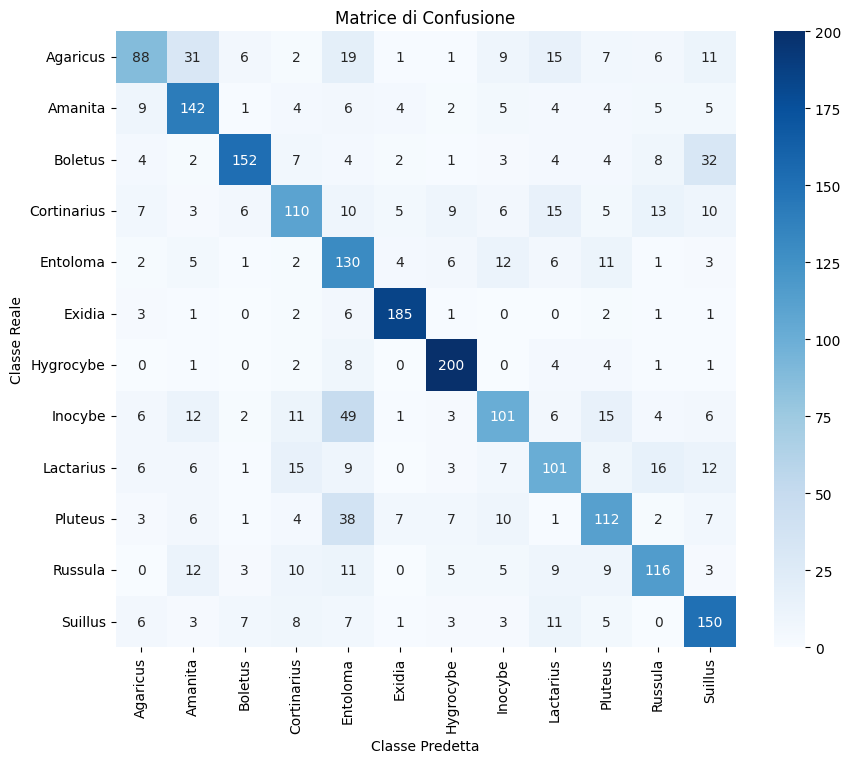

In [16]:
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize

# Mettiamo il modello in valutazione (fondamentale!)
model.eval()

y_true = []       # Etichette reali (indici)
y_pred_idx = []   # Indici predetti (0, 1, 2...)
y_probs = []      # Probabilità complete (per la ROC curve)

print("Avvio valutazione sul Test Set...")

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        # 1. Otteniamo l'output grezzo (Logits)
        outputs = model(images)

        # 2. Applichiamo Softmax per avere probabilità tra 0 e 1
        probs = F.softmax(outputs, dim=1)

        # 3. Otteniamo la classe con probabilità più alta
        _, preds = torch.max(outputs, 1)

        # 4. Spostiamo su CPU e convertiamo in liste Python/Numpy
        y_true.extend(labels.cpu().numpy())
        y_pred_idx.extend(preds.cpu().numpy())
        y_probs.extend(probs.cpu().numpy())

# Convertiamo in array numpy per facilitare i calcoli con sklearn
y_true = np.array(y_true)
y_pred_idx = np.array(y_pred_idx)
y_probs = np.array(y_probs)

# Recuperiamo i nomi delle classi
class_names = full_dataset.classes

# --- 1. CLASSIFICATION REPORT ---
print("\n" + "="*60)
print("REPORT DI CLASSIFICAZIONE")
print("="*60)
print(classification_report(y_true, y_pred_idx, target_names=class_names))

# --- 2. MATRICE DI CONFUSIONE ---
cm = confusion_matrix(y_true, y_pred_idx)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Classe Predetta')
plt.ylabel('Classe Reale')
plt.title('Matrice di Confusione')
plt.show()

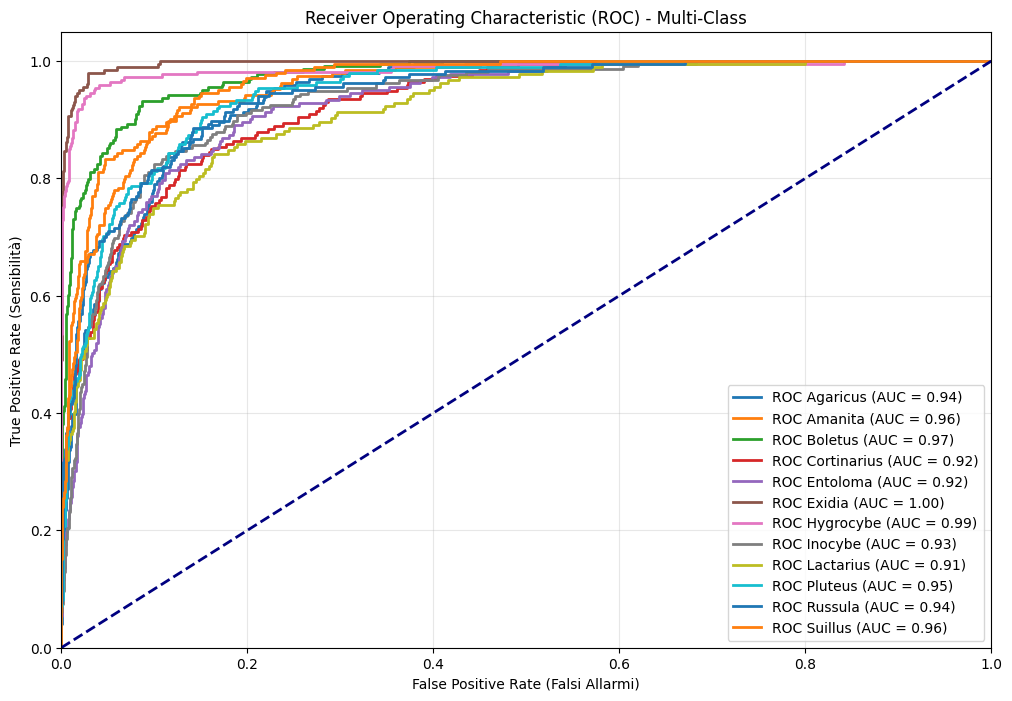

In [17]:
# --- 3. CURVE ROC E AUC ---

# Binarizziamo le etichette reali per il calcolo One-vs-Rest
# Esempio: se label è 2 -> [0, 0, 1, 0...]
n_classes = len(class_names)
y_true_bin = label_binarize(y_true, classes=range(n_classes))

# Dizionari per salvare i risultati
fpr = dict()
tpr = dict()
roc_auc = dict()

plt.figure(figsize=(12, 8))

# Calcoliamo la curva per ogni classe
for i in range(n_classes):
    # Calcola FPR e TPR confrontando la colonna i-esima delle probabilità
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    # Plotta la curva
    plt.plot(fpr[i], tpr[i], lw=2,
             label=f'ROC {class_names[i]} (AUC = {roc_auc[i]:.2f})')

# Plot della linea casuale (tratteggiata)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (Falsi Allarmi)')
plt.ylabel('True Positive Rate (Sensibilità)')
plt.title('Receiver Operating Characteristic (ROC) - Multi-Class')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()